In [3]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split # for splitting the data into training and testing sets
from sklearn.linear_model import LinearRegression, Ridge # models we are going to use
from sklearn.metrics import r2_score # for comparing the predicted and test values

In [82]:
df_run1  = pd.read_csv('chipVariantCalling_run1.tsv', sep='\t')
df_run1 = df_run1.dropna() #Drop all NaN values
df_run1 = df_run1.drop(columns = ['d.barcode', 'IMPACT', 'MSID']) #Dropping barcode, IMPACT and MSID column
df_run1 = df_run1[(df_run1.chipOrControl != "Blank") & (df_run1.chipOrControl != "Unknown")] #Removing blank, unknowns
 

df_run2 = pd.read_csv('chipVariantCalling_run2.tsv', sep='\t', low_memory=False)
df_run2 = df_run2.dropna() #Drop all NaN values
df_run2 = df_run2.drop(columns = ['d.barcode', 'IMPACT', 'MSID']) #Dropping barcode, IMPACT and MSID column
df_run2 = df_run2[(df_run2.chipOrControl != "Blank") & (df_run2.chipOrControl != "Unknown")] #Removing blank, unknowns
df_run1

,DP,VD,AF,HIAF,SYMBOL,loci,sampleTimePt,gender,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl
0,7281,26,0.0036,0.0033,GNB1,chr1:1747196_T/C,Baseline,Male,2:2,3644:3596,12:14,34.0,1.182210,CHIP
1,7281,26,0.0036,0.0033,GNB1,chr1:1747196_T/C,Baseline,Male,2:2,3644:3596,12:14,34.0,1.182210,CHIP
2,7281,26,0.0036,0.0033,GNB1,chr1:1747196_T/C,Baseline,Male,2:2,3644:3596,12:14,34.0,1.182210,CHIP
3,7281,26,0.0036,0.0033,GNB1,chr1:1747196_T/C,Baseline,Male,2:2,3644:3596,12:14,34.0,1.182210,CHIP
4,7282,29,0.0040,0.0036,GNB1,chr1:1747250_T/C,Baseline,Male,2:2,3639:3606,15:14,32.7,1.061729,CHIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536743,711,2,0.0028,0.0028,BRCC3,chrX:154305535_C/G,Y3,Female,2:2,356:353,1:1,25.0,1.008490,Control
536744,711,2,0.0028,0.0028,BRCC3,chrX:154305535_C/G,Y3,Female,2:2,356:353,1:1,25.0,1.008490,Control
536745,711,2,0.0028,0.0028,BRCC3,chrX:154305535_C/G,Y3,Female,2:2,356:353,1:1,25.0,1.008490,Control
536746,711,2,0.0028,0.0028,BRCC3,chrX:154305535_C/G,Y3,Female,2:2,356:353,1:1,25.0,1.008490,Control


In [96]:
df['gender'].unique()

array([nan], dtype=object)

In [97]:
#PARAMETER, VARIANCE DEPTH -->  df_run1 = df_run1[df_run1['VD'] < 800] 


#df_run1 = df_run1.replace({'gender': {'Male': 1, 'Female': 0}}) 

#df_run1['gender'] = df_run1['gender'].map({'Male': True, 'Female': False})
df_run1['gender']=df_run1.gender.astype(object)
df_run1['chipOrControl']=df_run1.gender.astype(object)
df_run1['sampleTimePt']=df_run1.gender.astype(object)

df_run1 = df_run1.replace({'gender': {'Male': 1, 'Female': 0}}) 
df_run1 = df_run1.replace({'sampleTimePt': {'Baseline': 1, 'Y3': 0}})
df_run1 = df_run1.replace({'chipOrControl': {'CHIP': 1, 'Control': 0}})

df_run1

,DP,VD,AF,HIAF,SYMBOL,loci,sampleTimePt,gender,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl
0,7281,26,0.0036,0.0033,GNB1,chr1:1747196_T/C,1,1,2:2,3644:3596,12:14,34.0,1.182210,1
1,7281,26,0.0036,0.0033,GNB1,chr1:1747196_T/C,1,1,2:2,3644:3596,12:14,34.0,1.182210,1
2,7281,26,0.0036,0.0033,GNB1,chr1:1747196_T/C,1,1,2:2,3644:3596,12:14,34.0,1.182210,1
3,7281,26,0.0036,0.0033,GNB1,chr1:1747196_T/C,1,1,2:2,3644:3596,12:14,34.0,1.182210,1
4,7282,29,0.0040,0.0036,GNB1,chr1:1747250_T/C,1,1,2:2,3639:3606,15:14,32.7,1.061729,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536743,711,2,0.0028,0.0028,BRCC3,chrX:154305535_C/G,0,0,2:2,356:353,1:1,25.0,1.008490,0
536744,711,2,0.0028,0.0028,BRCC3,chrX:154305535_C/G,0,0,2:2,356:353,1:1,25.0,1.008490,0
536745,711,2,0.0028,0.0028,BRCC3,chrX:154305535_C/G,0,0,2:2,356:353,1:1,25.0,1.008490,0
536746,711,2,0.0028,0.0028,BRCC3,chrX:154305535_C/G,0,0,2:2,356:353,1:1,25.0,1.008490,0


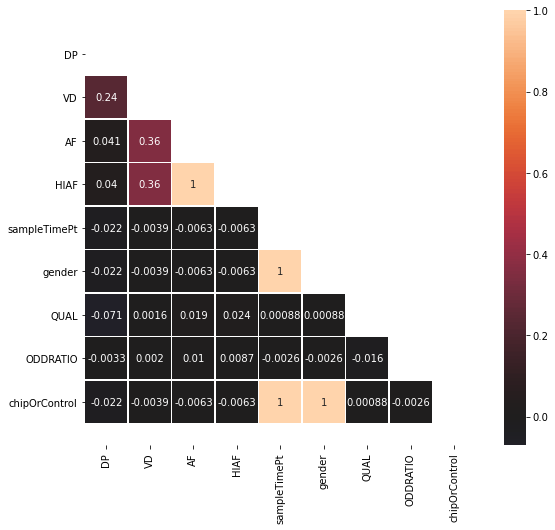

In [93]:
corrs = df_run1.corr() # calculate the correlation table
# as this is a symmetric table, set up a mask so that we only plot values below the main diagonal
mask = np.triu(np.ones_like(corrs, dtype=np.bool)) 
f, ax = plt.subplots(figsize=(10, 8)) # initialise the plots and axes
# plot the correlations as a seaborn heatmap, with a colourbar
sns.heatmap(corrs, mask=mask, center=0, annot=True, square=True, linewidths=.5) 
# do some fiddling so that the top and bottom are not obscured
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom + 0.5, top - 0.5);

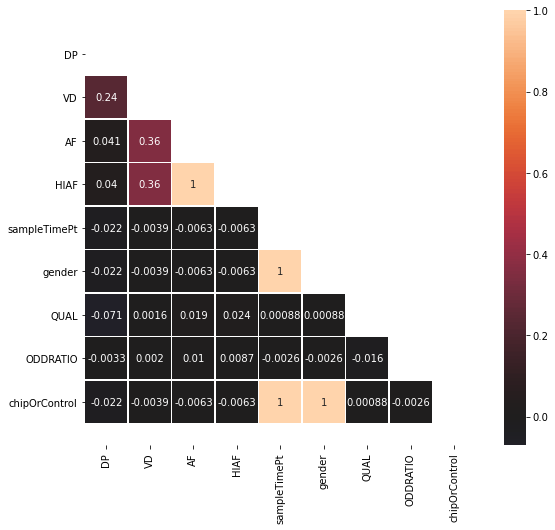

In [94]:
corrs = df_run1.corr() # calculate the correlation table
# as this is a symmetric table, set up a mask so that we only plot values below the main diagonal
mask = np.triu(np.ones_like(corrs, dtype=np.bool)) 
f, ax = plt.subplots(figsize=(10, 8)) # initialise the plots and axes
# plot the correlations as a seaborn heatmap, with a colourbar
sns.heatmap(corrs, mask=mask, center=0, annot=True, square=True, linewidths=.5) 
# do some fiddling so that the top and bottom a`re not obscured
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom + 0.5, top - 0.5); 